In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize

In [2]:
num_influencers = 1
num_consumer_producers = 20

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
perfect_market = ContentMarket(topics, production_rate, external_production_rate)
imperfect_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 1, 2)
    prod_func = lambda x: inverse_decay(x, 0.01, 2)
    perfect_consumer_producer = ConsumerProducer(prod_func, cons_func, 20, 0, 1, init_following_rates_method='equal')
    imperfect_consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 20, 0, 1, init_following_rates_method='equal')
    perfect_market.add_agent(perfect_consumer_producer)
    imperfect_market.add_agent(imperfect_consumer_producer)

    color = np.random.rand(3,)
    agent_colors[perfect_consumer_producer.index] = color

for i in range(num_influencers):
    perfect_influencer = Influencer(0, 1, init_following_rates_method='equal')
    imperfect_influencer = Influencer(0, 1, init_following_rates_method='equal')
    perfect_market.add_agent(perfect_influencer)
    imperfect_market.add_agent(imperfect_influencer)

    color = np.random.rand(3,)
    agent_colors[perfect_influencer.index] = color

In [5]:
perfect_market.finalize(method='even')
imperfect_market.finalize(method='even')

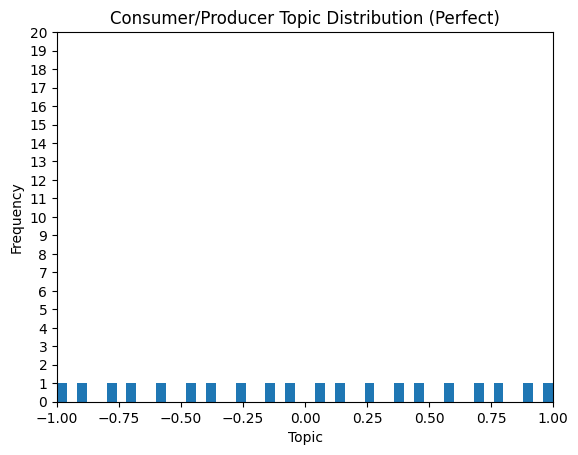

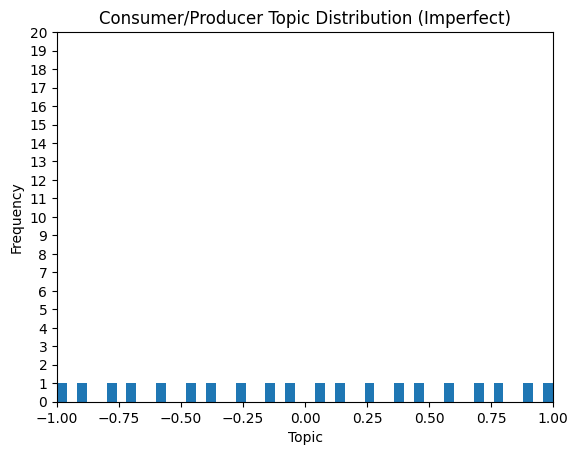

In [6]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution (Perfect)", perfect_market.consumers, -1, 1)
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution (Imperfect)", imperfect_market.consumers, -1, 1)

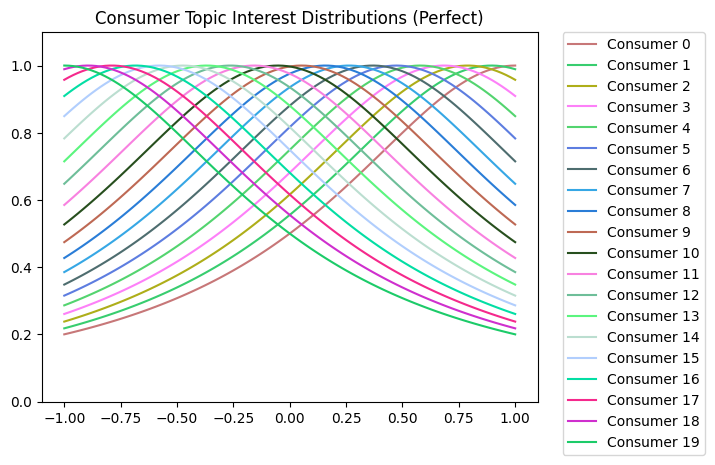

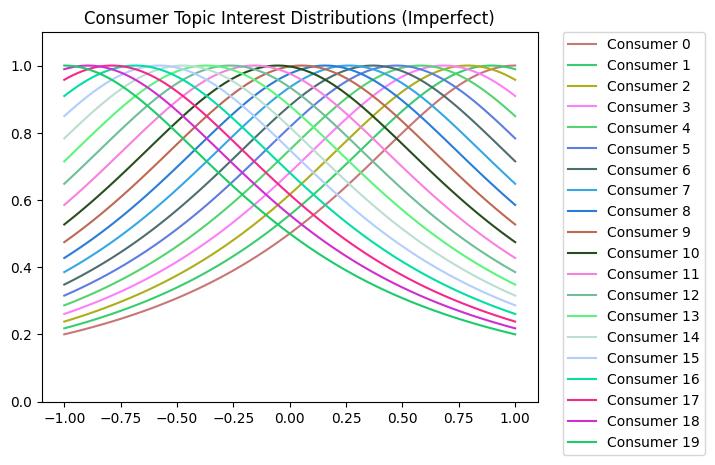

In [7]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions (Perfect)", perfect_market.consumers, -1, 1, agent_colors)
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions (Imperfect)", imperfect_market.consumers, -1, 1, agent_colors)

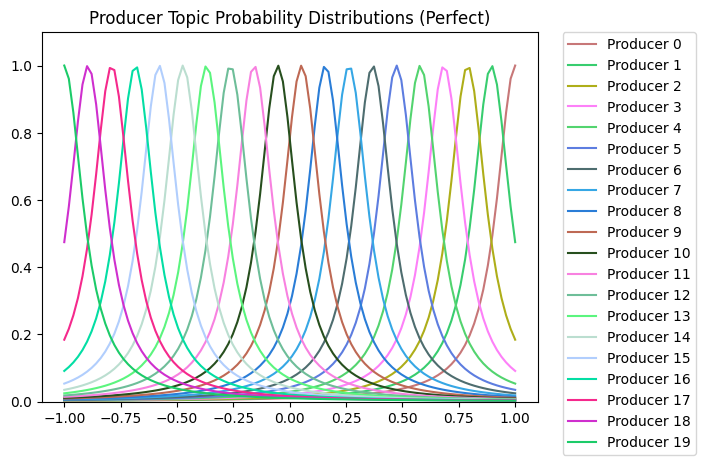

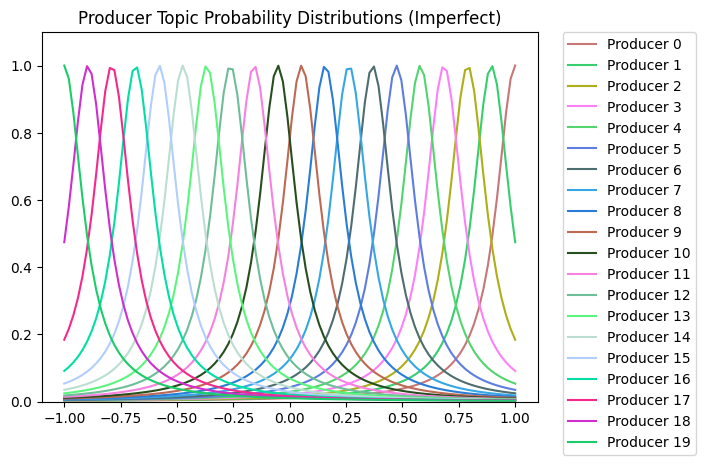

In [8]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions (Perfect)", perfect_market.producers, -1, 1, agent_colors)
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions (Imperfect)", imperfect_market.producers, -1, 1, agent_colors)

In [9]:
perfect_stats: TestStats = perfect_market.optimize(100, topic_position='main')
imperfect_stats: TestStats = imperfect_market.optimize(100, topic_position='main')

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing consumer 12
Optimizing consumer 13
Optimizing consumer 14
Optimizing consumer 15
Optimizing consumer 16
Optimizing consumer 17
Optimizing consumer 18
Optimizing consumer 19
Optimizing influencer 20
Optimizing producer 0
Optimization succeeded (overall 0.005476250080391765s): nit=3, nfev=14, njev=7.
Optimizing producer 1
Optimization succeeded (overall 0.004201125004328787s): nit=2, nfev=12, njev=6.
Optimizing producer 2
Optimization succeeded (overall 0.005019917036406696s): nit=4, nfev=14, njev=7.
Optimizing producer 3
Optimization succeeded (overall 0.005181708023883402s): nit=3, nfev=12, njev=6.
Optimizing producer 4
Optimization succeeded (overall 0.00433491705916822s): nit=3, nfev=12, njev=6.
Optimizing produ

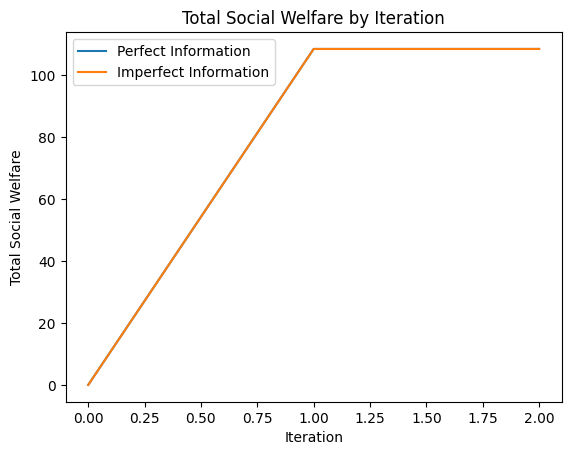

In [10]:
plt.figure()
plt.title("Total Social Welfare by Iteration")
plt.xlabel("Iteration")
plt.ylabel("Total Social Welfare")
plt.plot(perfect_stats.total_social_welfare, label="Perfect Information")
plt.plot(imperfect_stats.total_social_welfare, label="Imperfect Information")
plt.legend()
plt.show()

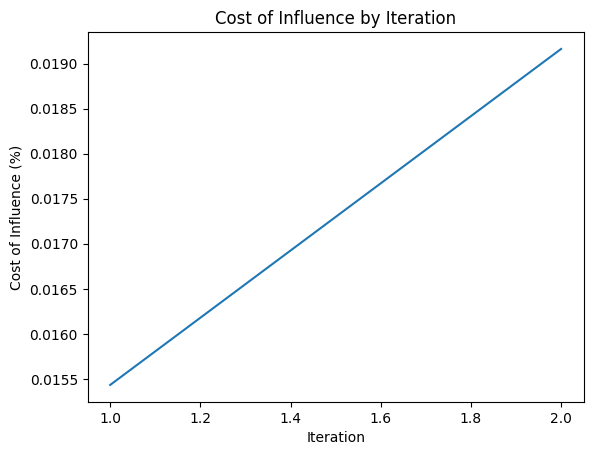

In [11]:
plt.figure()
plt.title("Cost of Influence by Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost of Influence (%)")
costs = []
for i in range(1, max(len(perfect_stats.total_social_welfare), len(imperfect_stats.total_social_welfare))):
    perfect_welfare = perfect_stats.total_social_welfare[i] + 1e-10 if i < len(perfect_stats.total_social_welfare) else perfect_stats.total_social_welfare[-1]
    imperfect_welfare = imperfect_stats.total_social_welfare[i] if i < len(imperfect_stats.total_social_welfare) else imperfect_stats.total_social_welfare[-1]
    costs.append((perfect_welfare - imperfect_welfare) / perfect_welfare * 100)
plt.plot(list(range(1, max(len(perfect_stats.total_social_welfare), len(imperfect_stats.total_social_welfare)))), costs)
plt.show()

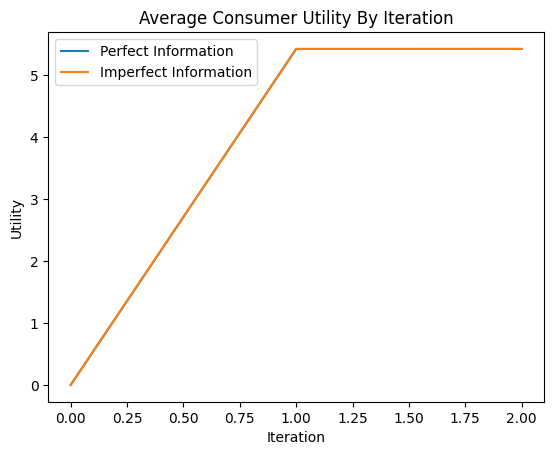

In [12]:
plt.figure()
plt.title("Average Consumer Utility By Iteration")
plt.plot(perfect_stats.average_consumer_utility, label="Perfect Information")
plt.plot(imperfect_stats.average_consumer_utility, label="Imperfect Information")
plt.xlabel("Iteration")
plt.ylabel("Utility")
plt.legend()
plt.show()

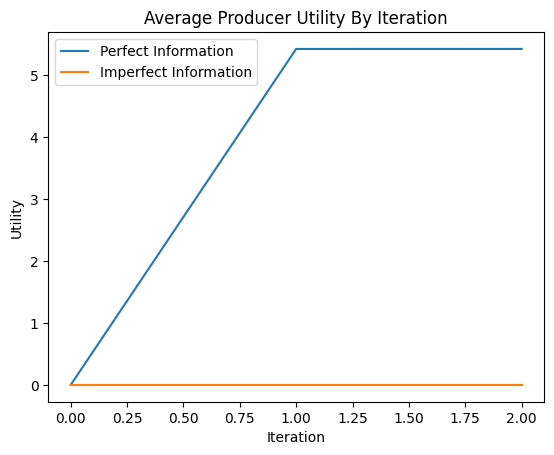

In [13]:
plt.figure()
plt.title("Average Producer Utility By Iteration")
plt.plot(perfect_stats.average_producer_utility, label="Perfect Information")
plt.plot(imperfect_stats.average_producer_utility, label="Imperfect Information")
plt.xlabel("Iteration")
plt.ylabel("Utility")
plt.legend()
plt.show()

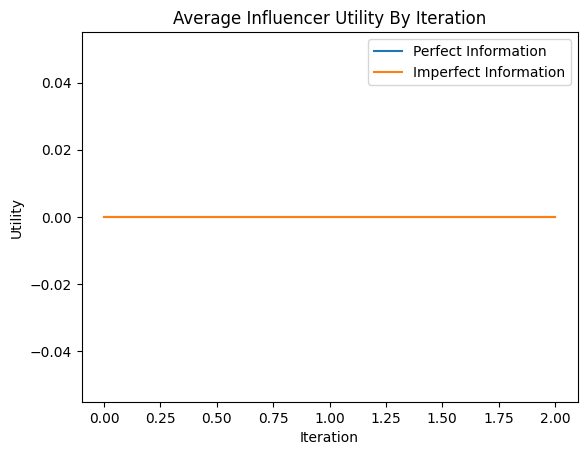

In [14]:
plt.figure()
plt.title("Average Influencer Utility By Iteration")
plt.plot(perfect_stats.average_influencer_utility, label="Perfect Information")
plt.plot(imperfect_stats.average_influencer_utility, label="Imperfect Information")
plt.xlabel("Iteration")
plt.ylabel("Utility")
plt.legend()
plt.show()

/var/folders/6q/4vwdpgt97yn2bsff6ptdg6pm0000gn/T/ipykernel_92135/1768661130.py:15: RuntimeWarning: invalid value encountered in scalar divide
  plt.plot([p.agent.main_interest for p in perfect_producers], [perfect_influencer_stats.following_rates[-1][p.agent.index] / perfect_influencer.attention_bound * 100 for p in perfect_producers], label="Perfect Information", marker='o')
/var/folders/6q/4vwdpgt97yn2bsff6ptdg6pm0000gn/T/ipykernel_92135/1768661130.py:16: RuntimeWarning: invalid value encountered in scalar divide
  plt.plot([p.agent.main_interest for p in imperfect_producers], [imperfect_influencer_stats.following_rates[-1][p.agent.index] / imperfect_influencer.attention_bound * 100 for p in imperfect_producers], label="Imperfect Information", marker='o')


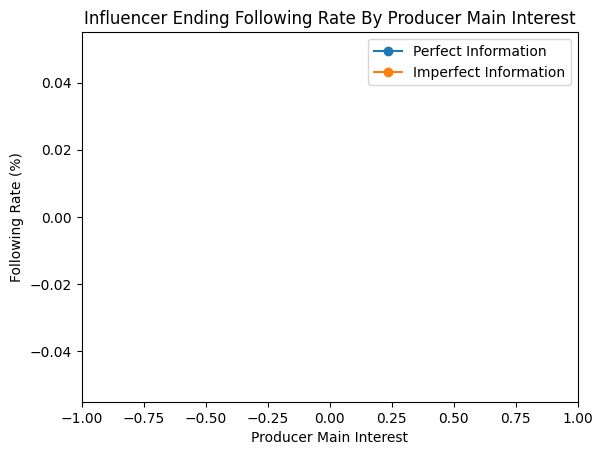

/var/folders/6q/4vwdpgt97yn2bsff6ptdg6pm0000gn/T/ipykernel_92135/1768661130.py:30: RuntimeWarning: invalid value encountered in scalar divide
  plt.plot([p.topics[-1] for p in perfect_producers], [perfect_influencer_stats.following_rates[-1][p.agent.index] / perfect_influencer.attention_bound * 100 for p in perfect_producers], label="Perfect Information", marker='o')
/var/folders/6q/4vwdpgt97yn2bsff6ptdg6pm0000gn/T/ipykernel_92135/1768661130.py:31: RuntimeWarning: invalid value encountered in scalar divide
  plt.plot([p.topics[-1] for p in imperfect_producers], [imperfect_influencer_stats.following_rates[-1][p.agent.index] / imperfect_influencer.attention_bound * 100 for p in imperfect_producers], label="Imperfect Information", marker='o')


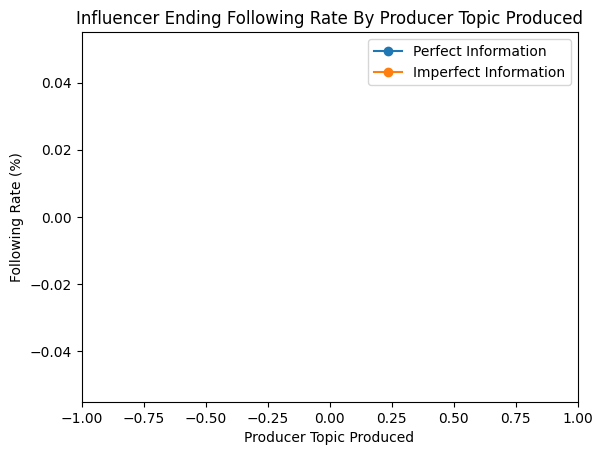

In [15]:
perfect_influencer = perfect_market.influencers[0]
perfect_influencer_stats = perfect_stats.influencer_stats[perfect_influencer.index]
imperfect_influencer = imperfect_market.influencers[0]
imperfect_influencer_stats = imperfect_stats.influencer_stats[imperfect_influencer.index]

perfect_producers = sorted(perfect_stats.producer_stats.values(), key=lambda x: x.agent.main_interest)
imperfect_producers = sorted(imperfect_stats.producer_stats.values(), key=lambda x: x.agent.main_interest)

plt.figure()
plt.title("Influencer Ending Following Rate By Producer Main Interest")
plt.xlabel("Producer Main Interest")
plt.ylabel("Following Rate (%)")
plt.xlim(topics[0][0], topics[0][1])

plt.plot([p.agent.main_interest for p in perfect_producers], [perfect_influencer_stats.following_rates[-1][p.agent.index] / perfect_influencer.attention_bound * 100 for p in perfect_producers], label="Perfect Information", marker='o')
plt.plot([p.agent.main_interest for p in imperfect_producers], [imperfect_influencer_stats.following_rates[-1][p.agent.index] / imperfect_influencer.attention_bound * 100 for p in imperfect_producers], label="Imperfect Information", marker='o')

plt.legend()
plt.show()

plt.figure()
plt.title("Influencer Ending Following Rate By Producer Topic Produced")
plt.xlabel("Producer Topic Produced")
plt.ylabel("Following Rate (%)")
plt.xlim(topics[0][0], topics[0][1])

perfect_producers = sorted(perfect_stats.producer_stats.values(), key=lambda x: x.topics[-1])
imperfect_producers = sorted(imperfect_stats.producer_stats.values(), key=lambda x: x.topics[-1])

plt.plot([p.topics[-1] for p in perfect_producers], [perfect_influencer_stats.following_rates[-1][p.agent.index] / perfect_influencer.attention_bound * 100 for p in perfect_producers], label="Perfect Information", marker='o')
plt.plot([p.topics[-1] for p in imperfect_producers], [imperfect_influencer_stats.following_rates[-1][p.agent.index] / imperfect_influencer.attention_bound * 100 for p in imperfect_producers], label="Imperfect Information", marker='o')

plt.legend()
plt.show()


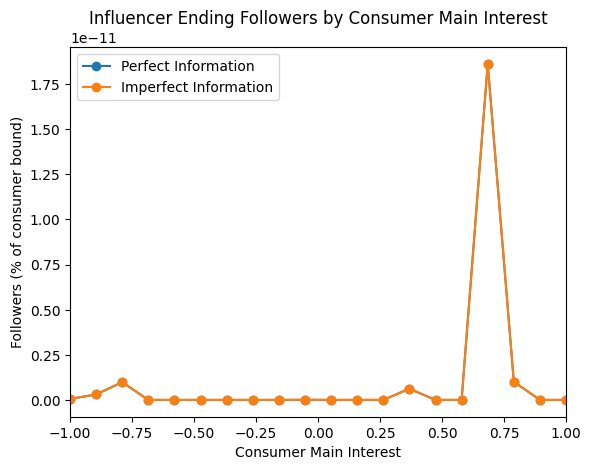

In [16]:



perfect_influencer_stats = list(perfect_stats.influencer_stats.values())[0]
perfect_influencer = perfect_market.influencers[0]
imperfect_influencer_stats = list(imperfect_stats.influencer_stats.values())[0]
imperfect_influencer = imperfect_market.influencers[0]

perfect_consumers: list[ConsumerProducer] = sorted(perfect_market.consumers, key=lambda x: x.main_interest)
imperfect_consumers: list[ConsumerProducer] = sorted(imperfect_market.consumers, key=lambda x: x.main_interest)

plt.figure()
plt.title("Influencer Ending Followers by Consumer Main Interest")
plt.xlabel("Consumer Main Interest")
plt.ylabel("Followers (% of consumer bound)")
plt.xlim(topics[0][0], topics[0][1])

plt.plot([c.main_interest for c in perfect_consumers], [perfect_stats.consumer_stats[c.index].following_rates[-1][perfect_influencer.index] / c.attention_bound * 100 for c in perfect_consumers], label="Perfect Information", marker='o')
plt.plot([c.main_interest for c in imperfect_consumers], [imperfect_stats.consumer_stats[c.index].following_rates[-1][imperfect_influencer.index] / c.attention_bound * 100 for c in imperfect_consumers], label="Imperfect Information", marker='o')

plt.legend()
plt.show()

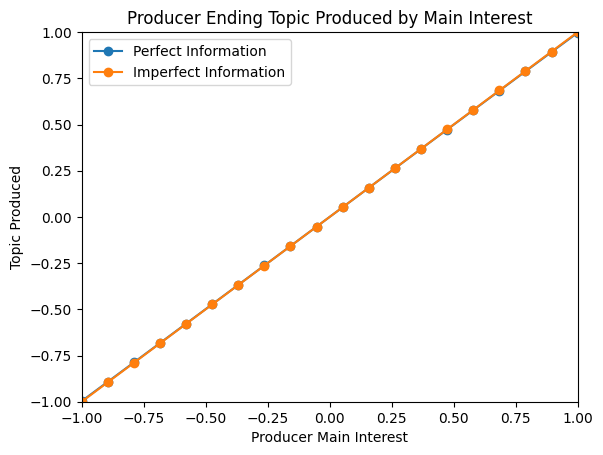

In [17]:
plt.figure()
plt.title("Producer Ending Topic Produced by Main Interest")
plt.xlabel("Producer Main Interest")
plt.ylabel("Topic Produced")
plt.xlim(topics[0][0], topics[0][1])
plt.ylim(topics[0][0], topics[0][1])

perfect_producer_stats = sorted(perfect_stats.producer_stats.values(), key=lambda x: x.agent.main_interest)
imperfect_producer_stats = sorted(imperfect_stats.producer_stats.values(), key=lambda x: x.agent.main_interest)

plt.plot([p.agent.main_interest for p in perfect_producer_stats], [p.topics[-1] for p in perfect_producer_stats], label="Perfect Information", marker='o')
plt.plot([p.agent.main_interest for p in imperfect_producer_stats], [p.topics[-1] for p in imperfect_producer_stats], label="Imperfect Information", marker='o')

plt.legend()
plt.show()

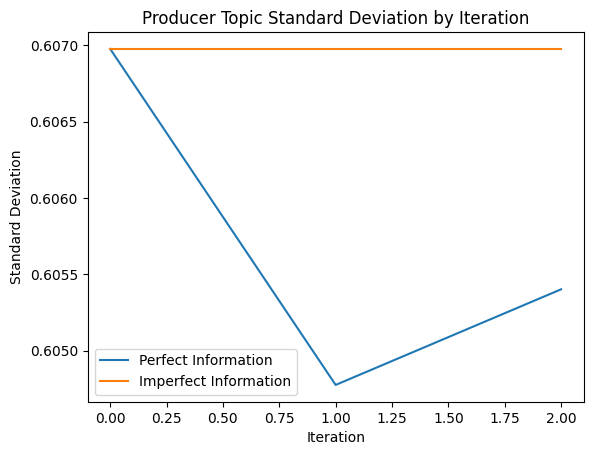

In [18]:
plt.figure()
plt.title("Producer Topic Standard Deviation by Iteration")
plt.xlabel("Iteration")
plt.ylabel("Standard Deviation")
plt.plot(perfect_stats.producer_topic_standard_deviation, label="Perfect Information")
plt.plot(imperfect_stats.producer_topic_standard_deviation, label="Imperfect Information")

plt.legend()
plt.show()

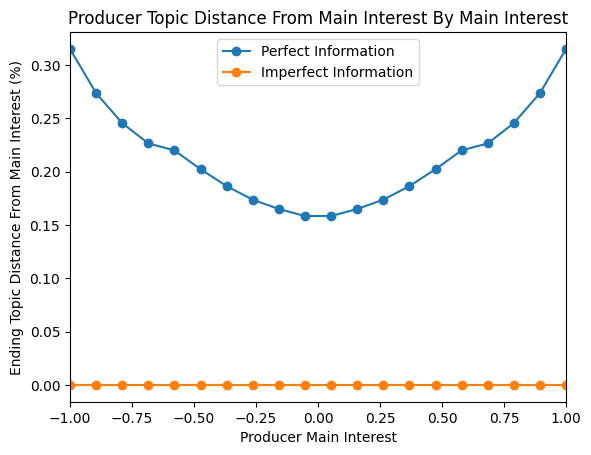

In [19]:
plt.figure()
plt.title("Producer Topic Distance From Main Interest By Main Interest")
plt.xlabel("Producer Main Interest")
plt.ylabel("Ending Topic Distance From Main Interest (%)")
plt.xlim(topics[0][0], topics[0][1])

perfect_producer_stats = sorted(perfect_stats.producer_stats.values(), key=lambda x: x.agent.main_interest)
imperfect_producer_stats = sorted(imperfect_stats.producer_stats.values(), key=lambda x: x.agent.main_interest)

plt.plot([p.agent.main_interest for p in perfect_producer_stats], [np.linalg.norm(p.topics[-1] - p.agent.main_interest) / (np.linalg.norm(p.agent.main_interest) + 1e-3) * 100 for p in perfect_producer_stats], label="Perfect Information", marker='o')
plt.plot([p.agent.main_interest for p in imperfect_producer_stats], [np.linalg.norm(p.topics[-1] - p.agent.main_interest) / (np.linalg.norm(p.agent.main_interest) + 1e-3) * 100 for p in imperfect_producer_stats], label="Imperfect Information", marker='o')

plt.legend()
plt.show()

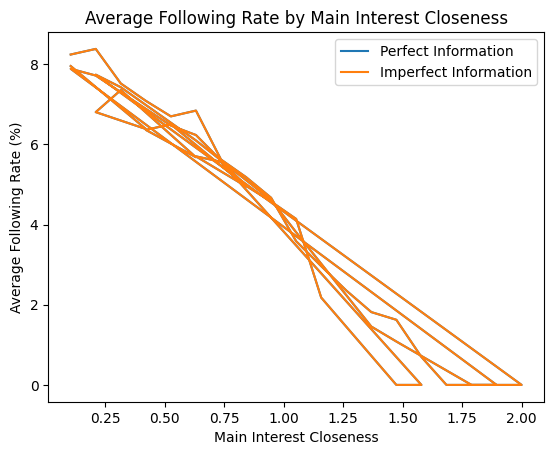

In [20]:
plt.figure()
plt.title("Average Following Rate by Main Interest Closeness")
plt.xlabel("Main Interest Closeness")
plt.ylabel("Average Following Rate (%)")

perfect_rates_by_closeness = dict()
imperfect_rates_by_closeness = dict()

for consumer_stat in perfect_stats.consumer_stats.values():
    for producer in perfect_market.producers:
        if producer == consumer_stat.agent:
            continue
        closeness = np.linalg.norm(producer.main_interest - consumer_stat.agent.main_interest)
        if closeness not in perfect_rates_by_closeness:
            perfect_rates_by_closeness[closeness] = []
        perfect_rates_by_closeness[closeness].append(consumer_stat.following_rates[-1][producer.index] / consumer_stat.agent.attention_bound * 100)
perfect_rates_by_closeness = {k: np.mean(v) for k, v in perfect_rates_by_closeness.items()}
plt.plot(list(perfect_rates_by_closeness.keys()), list(perfect_rates_by_closeness.values()), label="Perfect Information")

for consumer_stat in imperfect_stats.consumer_stats.values():
    for producer in imperfect_market.producers:
        if producer == consumer_stat.agent:
            continue
        closeness = np.linalg.norm(producer.main_interest - consumer_stat.agent.main_interest)
        if closeness not in imperfect_rates_by_closeness:
            imperfect_rates_by_closeness[closeness] = []
        imperfect_rates_by_closeness[closeness].append(consumer_stat.following_rates[-1][producer.index] / consumer_stat.agent.attention_bound * 100)
imperfect_rates_by_closeness = {k: np.mean(v) for k, v in imperfect_rates_by_closeness.items()}
plt.plot(list(imperfect_rates_by_closeness.keys()), list(imperfect_rates_by_closeness.values()), label="Imperfect Information")

plt.legend()
plt.show()

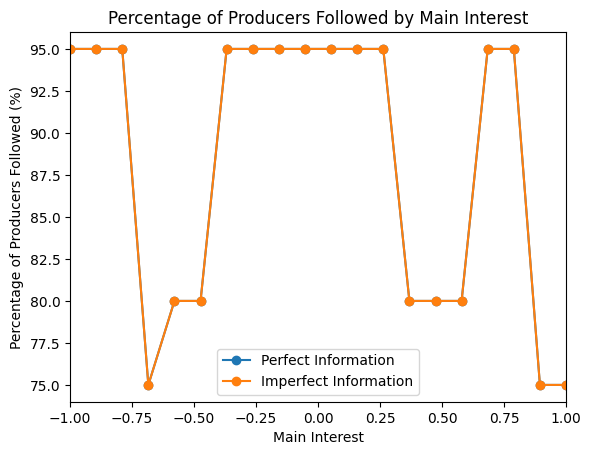

In [21]:
plt.figure()
plt.title("Percentage of Producers Followed by Main Interest")
plt.xlabel("Main Interest")
plt.ylabel("Percentage of Producers Followed (%)")
plt.xlim(topics[0][0], topics[0][1])

perfect_consumer_stats = sorted(perfect_stats.consumer_stats.values(), key=lambda x: x.agent.main_interest)
imperfect_consumer_stats = sorted(imperfect_stats.consumer_stats.values(), key=lambda x: x.agent.main_interest)

plt.plot([c.agent.main_interest for c in perfect_consumer_stats], [len([p for p in perfect_market.producers if c.following_rates[-1][p.index] > 0]) / len(perfect_market.producers) * 100 for c in perfect_consumer_stats], label="Perfect Information", marker='o')
plt.plot([c.agent.main_interest for c in imperfect_consumer_stats], [len([p for p in imperfect_market.producers if c.following_rates[-1][p.index] > 0]) / len(imperfect_market.producers) * 100 for c in imperfect_consumer_stats], label="Imperfect Information", marker='o')

plt.legend()
plt.show()

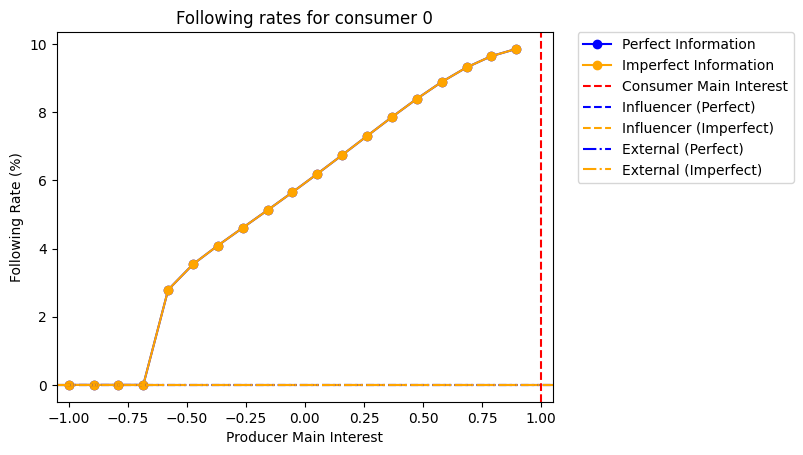

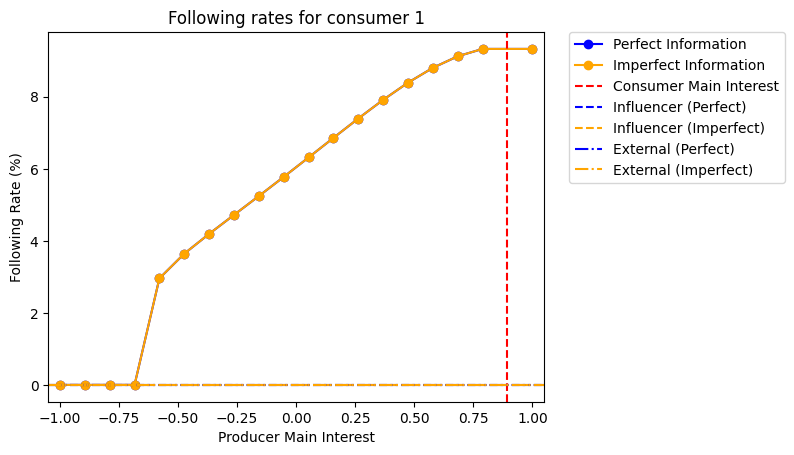

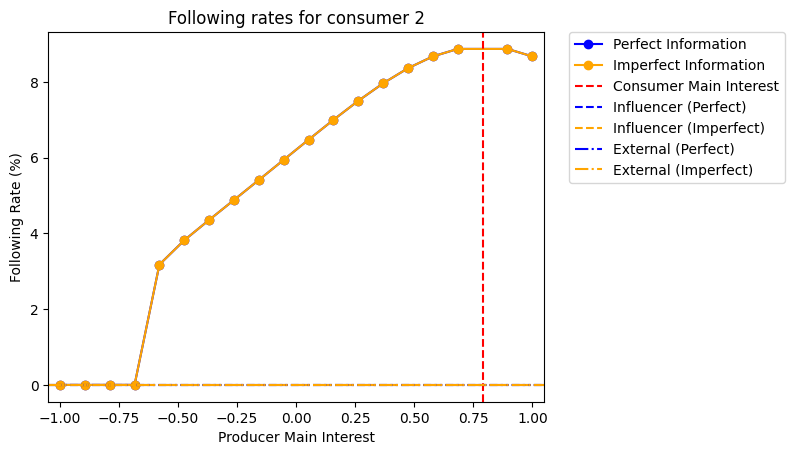

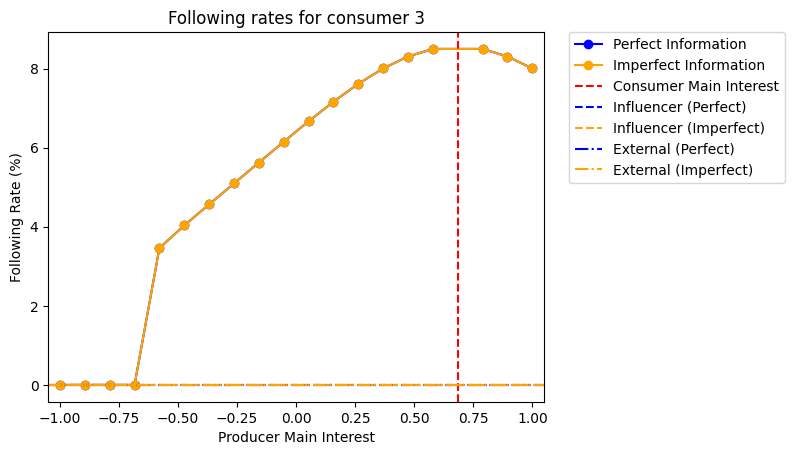

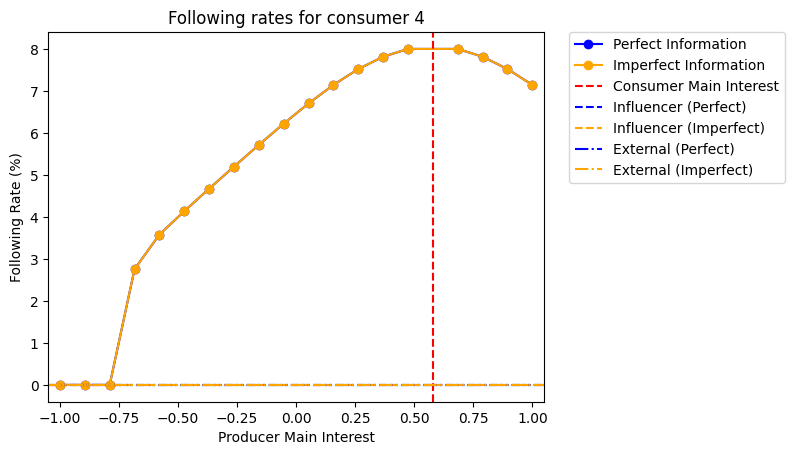

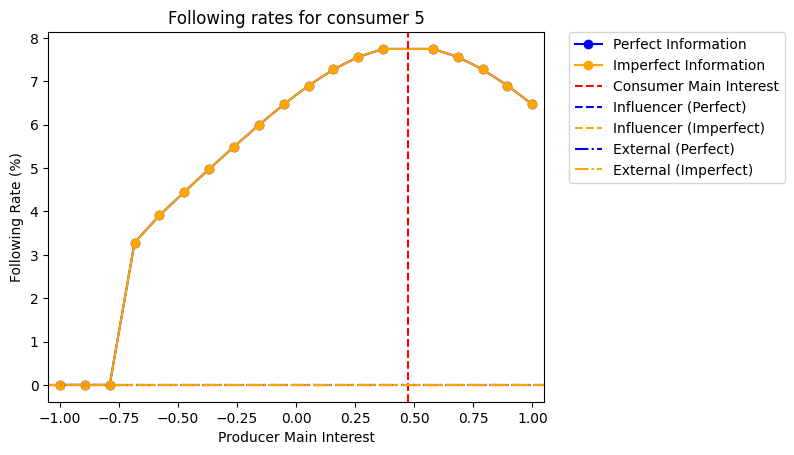

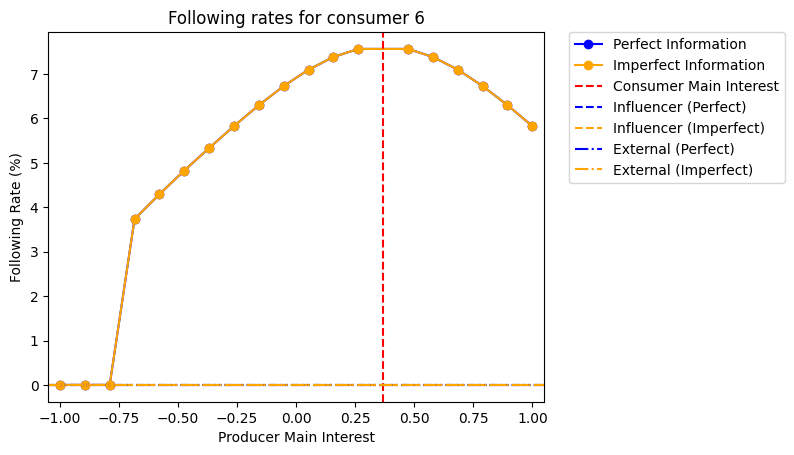

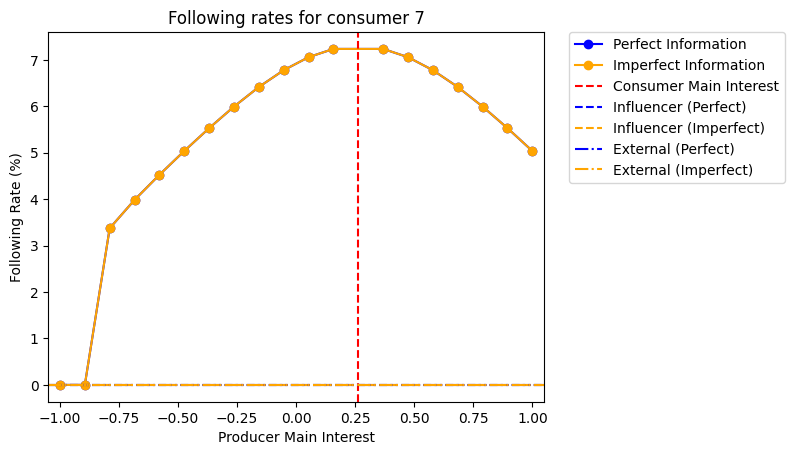

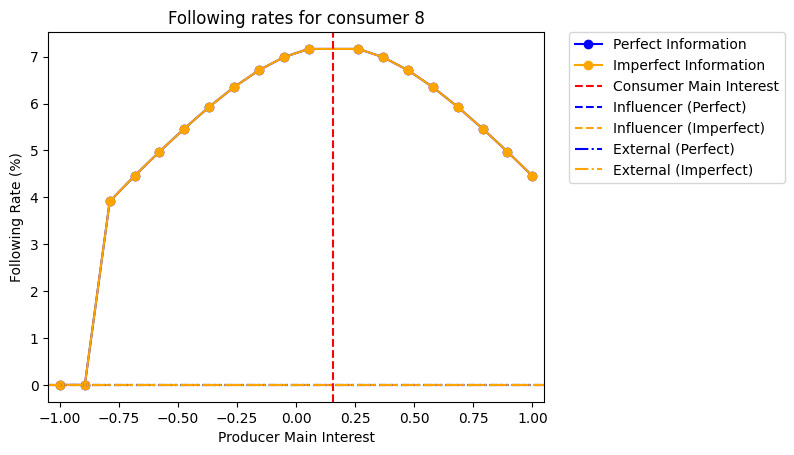

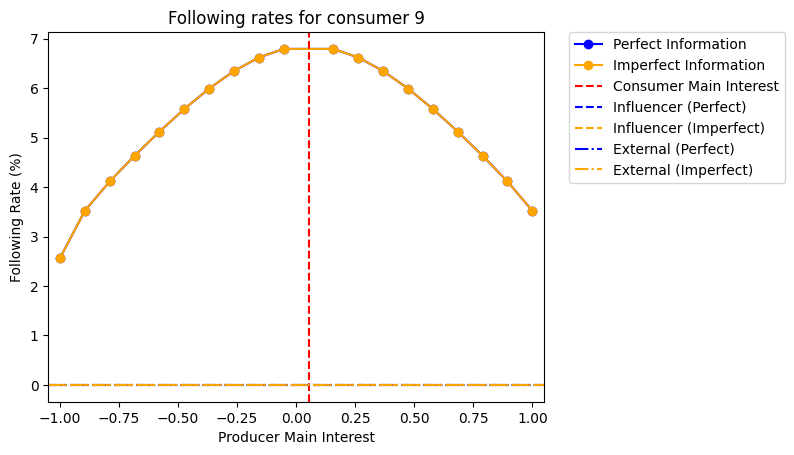

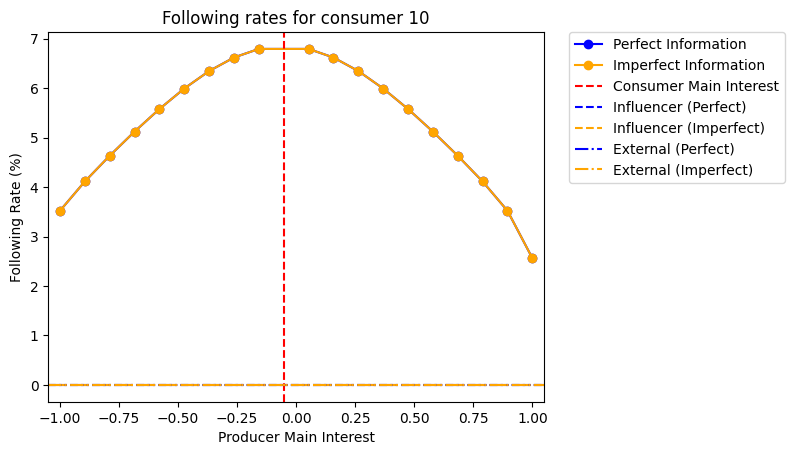

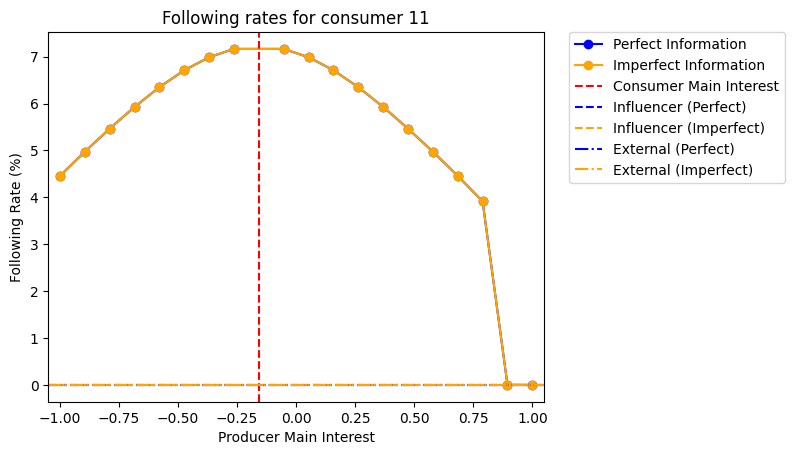

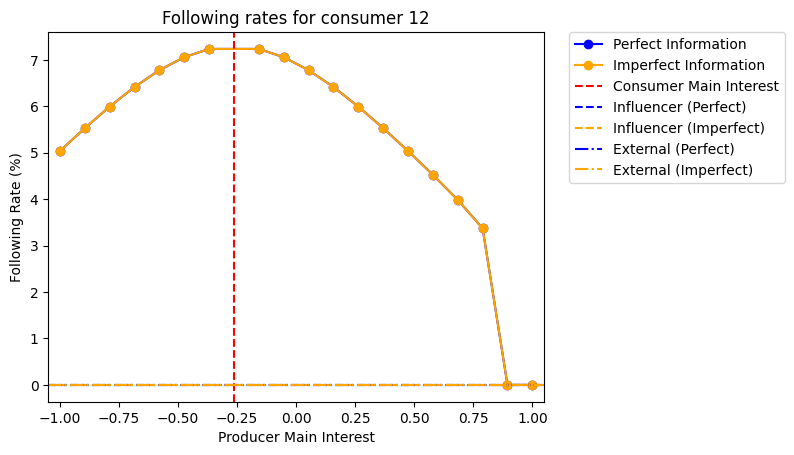

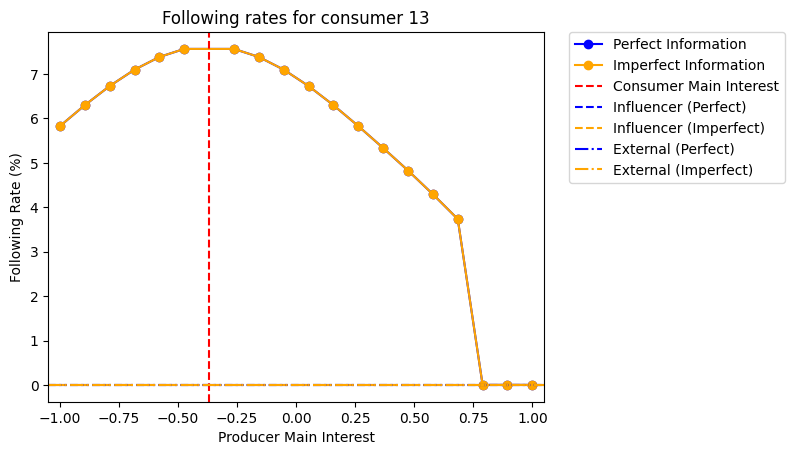

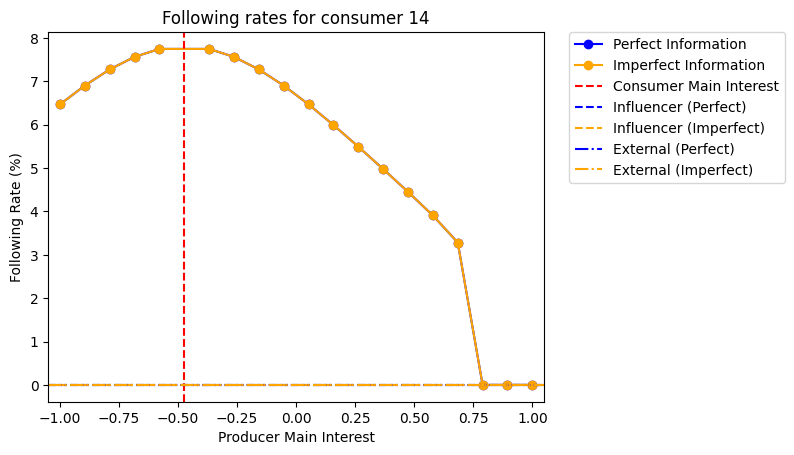

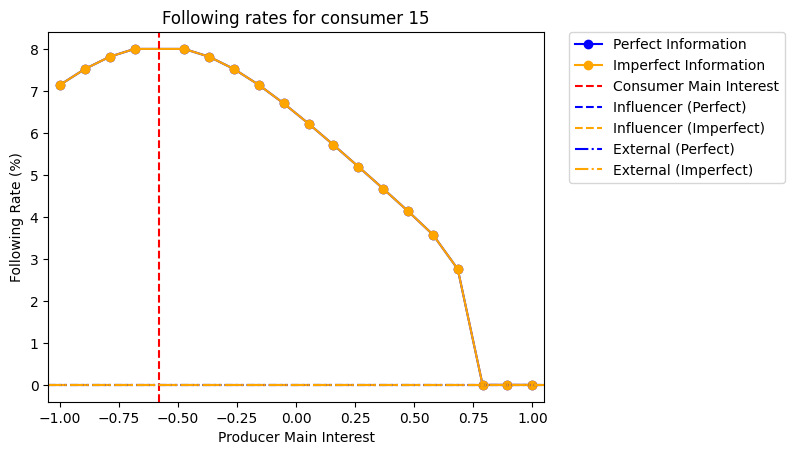

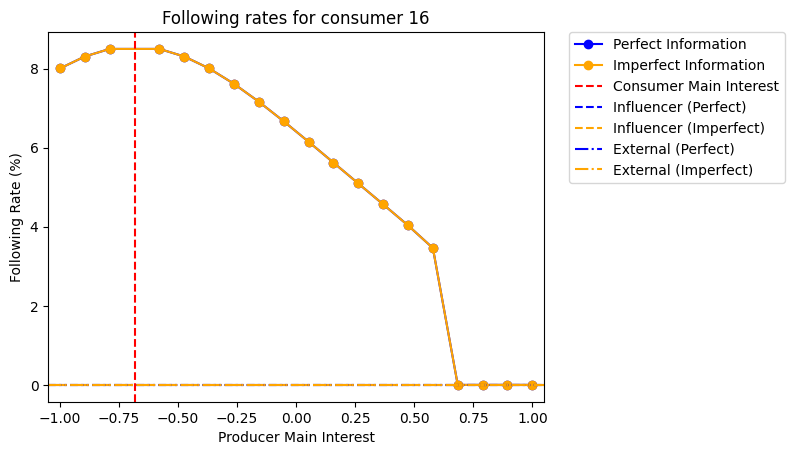

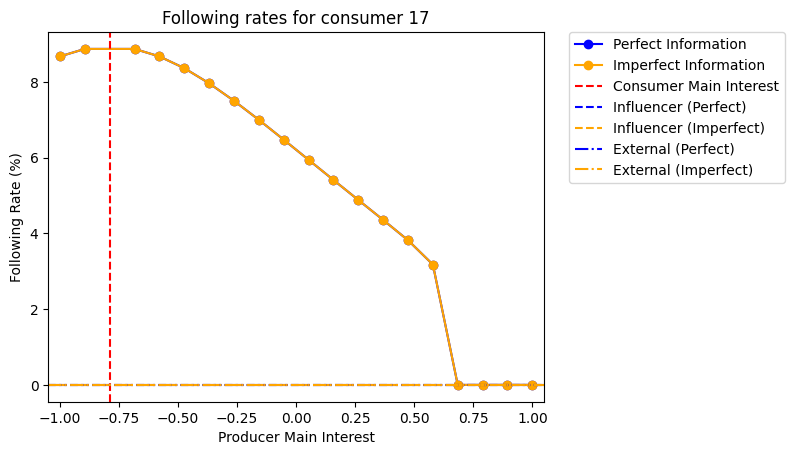

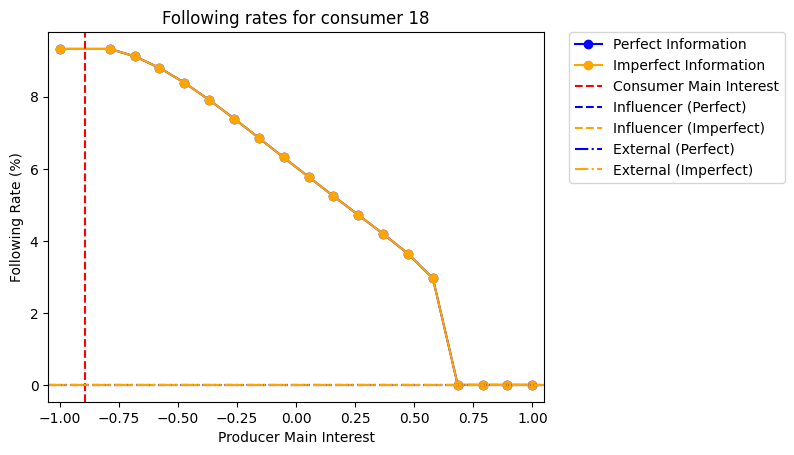

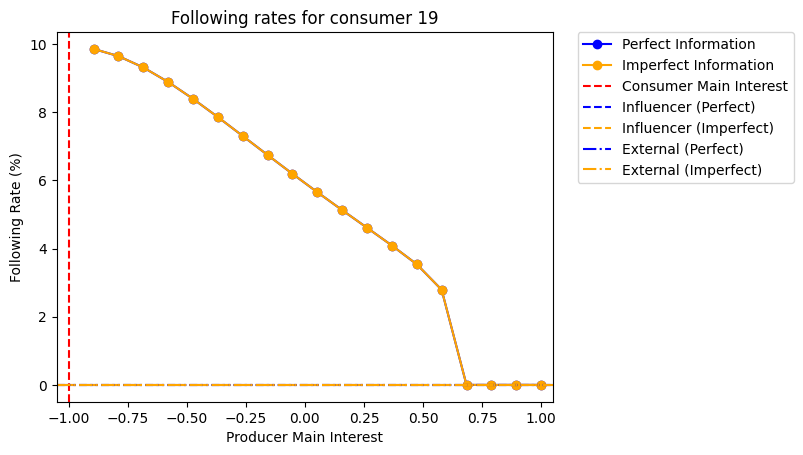

In [22]:
perfect_producers = sorted(perfect_market.producers, key=lambda x: x.main_interest)
imperfect_producers = sorted(imperfect_market.producers, key=lambda x: x.main_interest)

for consumer in perfect_market.consumers:
    perfect_stat = perfect_stats.consumer_stats[consumer.index]
    imperfect_stat = imperfect_stats.consumer_stats[consumer.index]

    plt.figure()
    plt.title(f"Following rates for consumer {consumer.index}")
    plt.xlabel("Producer Main Interest")
    plt.ylabel("Following Rate (%)")
    plt.xlim(topics[0][0] - 0.05, topics[0][1] + 0.05)

    plt.plot([p.main_interest for p in perfect_producers if p != perfect_stat.agent], [perfect_stat.following_rates[-1][p.index] / consumer.attention_bound * 100 for p in perfect_producers if p != perfect_stat.agent], label="Perfect Information", marker='o', color='blue')
    plt.plot([p.main_interest for p in imperfect_producers if p != imperfect_stat.agent], [imperfect_stat.following_rates[-1][p.index] / consumer.attention_bound * 100 for p in imperfect_producers if p != imperfect_stat.agent], label="Imperfect Information", marker='o', color='orange')

    # vertical line at consumer main interest
    plt.axvline(x=consumer.main_interest, color='r', linestyle='--', label="Consumer Main Interest")

    # horizontal line at influencer following rate
    plt.axhline(y=perfect_stat.following_rates[-1][-2] / consumer.attention_bound * 100, color='blue', linestyle='--', label="Influencer (Perfect)")
    plt.axhline(y=imperfect_stat.following_rates[-1][-2] / consumer.attention_bound * 100, color='orange', linestyle='--', label="Influencer (Imperfect)")

    # horizontal line at external following rate
    plt.axhline(y=perfect_stat.following_rates[-1][-1] / consumer.attention_bound * 100, color='blue', linestyle='-.', label="External (Perfect)")
    plt.axhline(y=imperfect_stat.following_rates[-1][-1] / consumer.attention_bound * 100, color='orange', linestyle='-.', label="External (Imperfect)")

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()